## Obstacle closeness penalty
$(1+|\gamma_{\theta}\theta_{i}|)^{-1}(\gamma_{x}max(x_i, \epsilon_x)^{2})^{-1}$


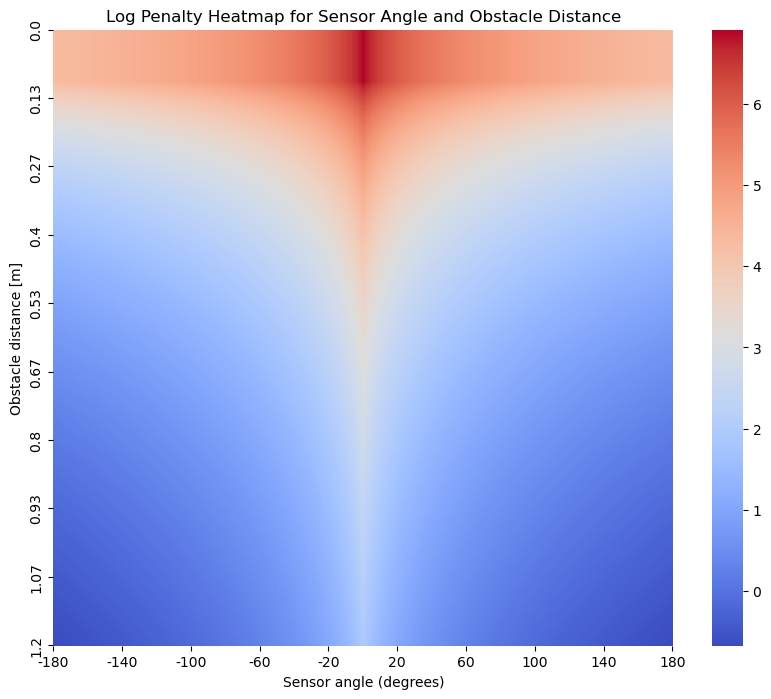

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator
import math

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


pi = math.pi
# Constants
gamma_theta = 4.0  # You need to set this value according to your paper
gamma_x = 0.1 # You need to set this value according to your paper 0.005

# let's assume we have sensor angles in range from -180 to 180 degrees
sensor_angles = np.linspace(-pi, pi, 721) # start, end, number of points
sensor_angles_deg = np.rad2deg(sensor_angles) # convert to degrees

# and we have obstacle distances in range from 0 to 50 units (meters, feet, etc.)
obstacle_distances = np.linspace(0, 1.2, 1000)

# create a 2D grid
X, Y = np.meshgrid(sensor_angles, obstacle_distances)

# calculate penalties based on the given function
penalties = np.log((1 + np.abs(gamma_theta * X)) ** -1 * (gamma_x * np.maximum(Y, 0.1)**2) ** -1)
# penalties = (1 + np.abs(gamma_theta * X)) ** -1 * (gamma_x * np.maximum(Y, 0.1)**2) ** -1
# Discretize penalties
num_bins = 20  # Number of bins you want
penalties_discrete = np.digitize(penalties, np.linspace(np.min(penalties), np.max(penalties), num_bins))

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(penalties_discrete, cmap='coolwarm', ax=ax, xticklabels=100, yticklabels=100)
sns.heatmap(penalties, cmap='coolwarm', ax=ax, xticklabels=100, yticklabels=100)
ax.set_xlabel('Sensor angle (degrees)')
ax.set_ylabel('Obstacle distance [m]')
ax.set_title('Log Penalty Heatmap for Sensor Angle and Obstacle Distance')
# Format tick labels

# Set up ticks
num_ticks = 10
x_ticks = np.linspace(start=-180, stop=180, num=num_ticks)  # adjust these parameters for your specific case
x_tick_indices = [find_nearest(sensor_angles_deg, tick) for tick in x_ticks]
ax.set_xticks(x_tick_indices)
ax.set_xticklabels([int(x) for x in x_ticks])

# Similarly for y_ticks (adjust the parameters for your specific case)
y_ticks = np.linspace(start=0, stop=1.2, num=num_ticks)  
y_tick_indices = [find_nearest(obstacle_distances, tick) for tick in y_ticks]
ax.set_yticks(y_tick_indices)
ax.set_yticklabels([round(y,2) for y in y_ticks])

plt.show()


## Cross-error reward

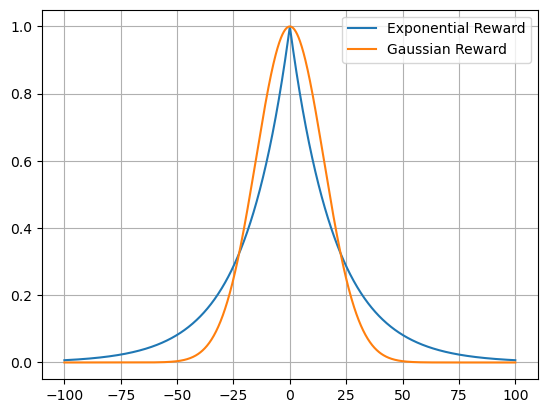

In [86]:
from scipy.stats import norm
gammma_e = 0.05
e = np.linspace(-100, 100, 1000) # start, end, number of points
exp_reward = np.exp(-gammma_e * np.abs(e))

mu = 0
sigma = 15
sigma_adj = np.sqrt(2 * np.pi) * sigma

# PDF (Probability Density Function)
pdf = norm.pdf(e, mu, sigma)

# Adjust the PDF so that its peak is 1
gaussian_reward = pdf / norm.pdf(mu, mu, sigma)

plt.plot(e, exp_reward)
plt.plot(e, gaussian_reward)
plt.grid()
plt.legend(['Exponential Reward', 'Gaussian Reward'])

-1.0 4.409421608308928


[Text(0, 0, '-180'),
 Text(0, 80, '-140'),
 Text(0, 160, '-100'),
 Text(0, 240, '-60'),
 Text(0, 320, '-20'),
 Text(0, 400, '20'),
 Text(0, 480, '60'),
 Text(0, 560, '100'),
 Text(0, 640, '140'),
 Text(0, 720, '180')]

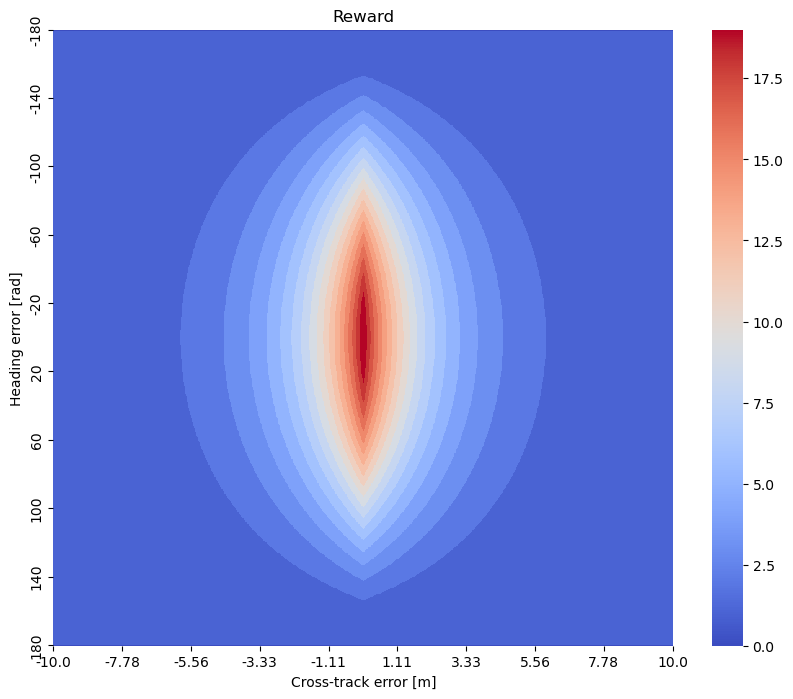

In [135]:
e_min = -10
e_max = -e_min
gammma_e = 0.5
gamma_theta = 10
e = np.linspace(e_min, e_max, 1000) # start, end, number of points
heading_error = np.linspace(-pi, pi, 721) # start, end, number of points
X, Y = np.meshgrid(e, heading_error)
reward = -1 + (1 * np.cos(Y)+1) * (np.exp(-gammma_e * np.abs(X) + 1))
print(reward.min(), reward.max())
# reward = np.log(reward)
# Discretize penalties
min_reward = np.min(reward)
max_reward= np.max(reward)
bins = np.linspace(min_reward, max_reward, num_bins)
num_bins = 20  # Number of bins you want
reward_discrete = np.digitize(reward, bins, num_bins)

fig, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(reward, cmap='coolwarm', ax=ax, xticklabels=100, yticklabels=100)
sns.heatmap(reward_discrete, cmap='coolwarm', ax=ax, xticklabels=100, yticklabels=100)
ax.set_xlabel('Cross-track error [m]')
ax.set_ylabel('Heading error [rad]')
ax.set_title('Reward')

# Set up ticks
num_ticks = 10
x_ticks = np.linspace(start=e_min, stop=e_max, num=num_ticks)  # adjust these parameters for your specific case
x_tick_indices = [find_nearest(e, tick) for tick in x_ticks]
ax.set_xticks(x_tick_indices)
ax.set_xticklabels([round(x, 2) for x in x_ticks])

# Similarly for y_ticks (adjust the parameters for your specific case)
y_ticks = np.linspace(start=-180, stop=180, num=num_ticks)  
y_tick_indices = [find_nearest(sensor_angles_deg, tick) for tick in y_ticks]
ax.set_yticks(y_tick_indices)
ax.set_yticklabels([int(y) for y in y_ticks])